# CASO RANKING FIFA

En este caso de estudio se va a analizar el comportamiento del ranking FIFA desde que inició su medición en el año 1993, a fin de presentar al público la situación y el rendimiento de las distintas selecciones nacionales afiliadas.

En este contexto, nos interesa contestar entre otras las siguientes preguntas:

* ¿Cómo es el rendimiento histórico por confederación?
* ¿Cómo ha sido el rendimiento histórico de su país comparado con el promedio de la confederación a la cual pertenece?
* ¿Cuáles han sido históricamente los mejores países?
* ¿Quienes han sido los top 5 países previo al inicio de cada mundial? ¿Entre estos países han estado los campeones del mundo correspondientes?
* Según esta puntuación, ¿las selecciones son cada vez más competitivas o cada vez parece existir más diferencia a través del tiempo?

Con este propósito usted cuenta con un conjunto de datos en el archivo fifa_rank.csv cuyas columnas se detallan a continuación:

Dimensiones:

* Country: Nombre del pais afiliado a la FIFA cuya selección de fútbol es puntuada
* Confederation: Confederación a la que pertenece de acuerdo a la división de la FIFA
* Rank_Date: Fecha de publicación del ranking FIFA entre marzo de 1993 y junio de 2018 (previo al mundial de Rusia)
* Points_Old_Version: Puntos obtenidos conforme el sistema antiguo de la FIFA (previo al año 2011)
* Ponts_New_Version: Puntos obtenidos conforme el sistema nuevo de la FIFA (a partir del años 2011)
* rank: Posición en el ranking oficial de la FIFA dados los puntos calculados

## Carga de librerias

- pandas: Manejo de tablas de datos (data frames).
- numpy: Operaciones numéricas y estadística descriptiva.
- matplotlib.pyplot: Visualizaciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargar los datos

In [2]:
df_fifa = pd.read_csv ('https://raw.githubusercontent.com/jsaraujott/datos/refs/heads/main/fifa_rank.csv', sep= ',')

## Diagnóstico inicial

- Estructura de los datos (dimensiones y columnas)
- Existencia de valores perdidos
- Tipos de variables en cada columna y sus particularidades

In [3]:
#Visualizar la informacion general de los datos
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57797 entries, 0 to 57796
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             57797 non-null  object 
 1   Confederation       54815 non-null  object 
 2   Rank_Date           57797 non-null  object 
 3   Points_Old_Version  40382 non-null  float64
 4   Points_New_Version  57797 non-null  object 
 5   rank                57797 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.6+ MB


In [4]:
#Mirar una muestra pqueña de datos
df_fifa.sample(10)

,Country,Confederation,Rank_Date,Points_Old_Version,Points_New_Version,rank
55784,Mauritania,CAF,2017-09-14,NaN,365.04,98
52130,Croatia,UEFA,2016-04-07,NaN,855.61,23
36206,Cambodia,AFC,2009-10-16,67.0,ND,171
47261,Curazao,CONCACAF,2014-04-10,NaN,64.75,178
36363,Botswana,CAF,2009-11-20,213.0,ND,121
38194,Georgia,UEFA,2010-09-15,237.0,ND,89
44599,Ukraine,UEFA,2013-04-11,NaN,674.53,37
3082,Tajikistan,AFC,1995-05-16,2.0,ND,160
57733,Burundi,CAF,2018-06-07,NaN,174.16,148
4887,Maldives,AFC,1996-04-24,2.0,ND,167


In [5]:
#Visualizar los casos unicos que tienen confederacion
df_fifa ['Confederation'].unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', nan], dtype=object)

- Los nombres de las columnas no están bien presentados, en concreto rank esta en minúsculas y el resto no. Se debería estandarizar a un mismo formato. 
"snake_case" es cambiar espacios por _ y que todos los caracteres esten en minuscula

- Las columnas Confederation, Points_Old_Version y Poins_New_Version tendrían valores perdidos que requieren un análisis en mayor profundidad.

- La columna Points_New_Version es de un tipo object (string) que no corresponde dada su naturaleza. Debería cambiarse al tipo float.

- La columna Rank_Date es de un tipo object (string) que no corresponde dada su naturaleza. Debería cambiarse al tipo fecha (datetime).

- Se podria contar con campos adicionales de años y meses a partir de Rank_Date considerando que los datos mentienen una periodicidad mensual.

- Se podria unificar Points_Old_Version y Poins_New_Version en una sola columna puesto que ambas variables miden lo mismo.

- Al existir demasiados datos se debería verificar la existencia de potenciales duplicados.

## Procesamiento

**Ajustar nombres de columnas en formato snake_case**

In [6]:
#Extraer los nombres originales de las columnas
col_originales = df_fifa.columns

col_nuevas = [col.lower() for col in col_originales]

df_fifa.columns = col_nuevas

df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57797 entries, 0 to 57796
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             57797 non-null  object 
 1   confederation       54815 non-null  object 
 2   rank_date           57797 non-null  object 
 3   points_old_version  40382 non-null  float64
 4   points_new_version  57797 non-null  object 
 5   rank                57797 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.6+ MB


**Ajustar el formato de la columna rank_date**

In [7]:
df_fifa ['rank_date'] = pd.to_datetime (df_fifa ['rank_date'])

df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57797 entries, 0 to 57796
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             57797 non-null  object        
 1   confederation       54815 non-null  object        
 2   rank_date           57797 non-null  datetime64[ns]
 3   points_old_version  40382 non-null  float64       
 4   points_new_version  57797 non-null  object        
 5   rank                57797 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.6+ MB


**Adicionar columnas de año y mes**

In [8]:
#Columna year
df_fifa ['year'] = pd.DatetimeIndex(df_fifa['rank_date']).year

#Columna month

df_fifa['month'] = pd.DatetimeIndex(df_fifa['rank_date']).month

df_fifa.sample(10)

,country,confederation,rank_date,points_old_version,points_new_version,rank,year,month
50684,IR Iran,AFC,2015-09-03,NaN,716.13,40,2015,9
39462,Iceland,UEFA,2011-03-09,263.0,ND,115,2011,3
55904,France,UEFA,2017-10-16,NaN,1226.29,7,2017,10
28752,Tahiti,NaN,2006-10-18,55.0,ND,172,2006,10
51113,Cameroon,CAF,2015-11-05,NaN,597.42,51,2015,11
56058,Belize,CONCACAF,2017-10-16,NaN,124.88,161,2017,10
50349,Kuwait,AFC,2015-07-09,NaN,242.46,123,2015,7
3867,Latvia,UEFA,1995-10-17,23.0,ND,54,1995,10
44771,San Marino,UEFA,2013-04-11,NaN,0,207,2013,4
35939,Guatemala,CONCACAF,2009-09-02,316.0,ND,111,2009,9


Una vez que se tienen estas columnas, es conveniente hacer una primera visualización que muestre cuantos registros existen por cada mes y año.

In [9]:
#Contruis una tabla nueva en la que vea cuantas filas hay por cada mes y año

df_grupos_meses = df_fifa.groupby(['year', 'month'])['country'].count()

df_grupos_meses


year  month
1993  8        167
      9        167
      10       167
      11       168
      12       168
              ... 
2018  2        211
      3        211
      4        211
      5        211
      6        211
Name: country, Length: 285, dtype: int64

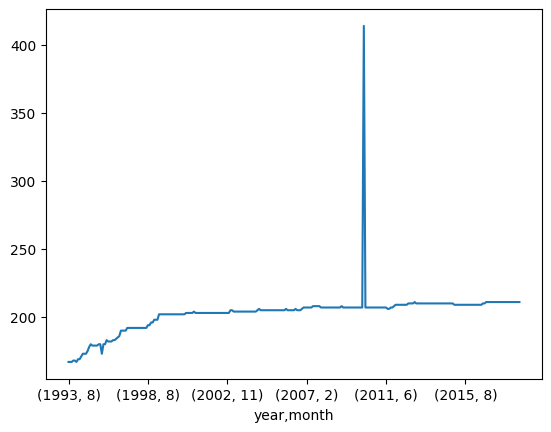

In [10]:
# Visualizacion de estos datos

df_grupos_meses.plot(kind='line')

plt.show()

**Ajuste de la columna points_old_version**

In [11]:
df_fifa['points_old_version'].value_counts(dropna= False)

points_old_version
NaN       17415
0.0        1044
7.0         301
11.0        295
3.0         295
          ...  
1250.0        1
1102.0        1
1047.0        1
1043.0        1
942.0         1
Name: count, Length: 1376, dtype: int64

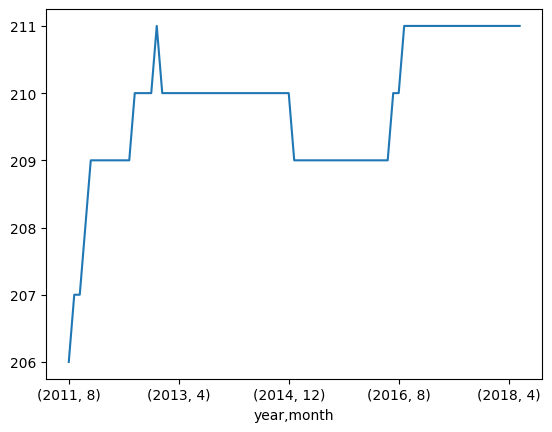

In [12]:
# Agrupar cuantos casos estan perdidos por mes y año

df_fifa[df_fifa['points_old_version'].isna()][['year','month']].value_counts().sort_index().plot( kind= 'line')

plt.show()



Ajustar columna points_new_version


In [13]:
df_fifa['points_new_version'].value_counts(dropna= False)

points_new_version
ND         40382
0            333
63.75         48
38.25         39
66            33
           ...  
1156.01        1
1174.34        1
1176.88        1
1329.86        1
165.84         1
Name: count, Length: 11115, dtype: int64

In [14]:
#Filtrar todos estos caso que aparecen como ND (Valores perdidos)

df_fifa[df_fifa['points_new_version']== 'ND'][['year', 'month']].value_counts().sort_index()

year  month
1993  8        167
      9        167
      10       167
      11       168
      12       168
              ... 
2011  3        207
      4        207
      5        207
      6        207
      7        206
Name: count, Length: 202, dtype: int64

In [15]:
#Asignar el valor numero a los ND

df_fifa['points_new_version'] = df_fifa['points_new_version'].replace('ND',np.nan)

In [16]:
df_fifa['points_new_version'].value_counts(dropna= False)

points_new_version
NaN        40382
0            333
63.75         48
38.25         39
66            33
           ...  
1156.01        1
1174.34        1
1176.88        1
1329.86        1
165.84         1
Name: count, Length: 11115, dtype: int64

In [17]:
#Cambiar el tipo de variable a float

df_fifa['points_new_version'] = df_fifa['points_new_version'].astype(float)

In [18]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57797 entries, 0 to 57796
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             57797 non-null  object        
 1   confederation       54815 non-null  object        
 2   rank_date           57797 non-null  datetime64[ns]
 3   points_old_version  40382 non-null  float64       
 4   points_new_version  17415 non-null  float64       
 5   rank                57797 non-null  int64         
 6   year                57797 non-null  int32         
 7   month               57797 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 3.1+ MB


## Ajustar columna confederation

In [19]:
df_fifa['confederation'].value_counts(dropna= False)

confederation
UEFA        14934
CAF         14876
AFC         12481
CONCACAF     9664
NaN          2982
CONMEBOL     2860
Name: count, dtype: int64

In [20]:
df_fifa ['confederation'] = df_fifa ['confederation'].fillna('OFC')

In [21]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57797 entries, 0 to 57796
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             57797 non-null  object        
 1   confederation       57797 non-null  object        
 2   rank_date           57797 non-null  datetime64[ns]
 3   points_old_version  40382 non-null  float64       
 4   points_new_version  17415 non-null  float64       
 5   rank                57797 non-null  int64         
 6   year                57797 non-null  int32         
 7   month               57797 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 3.1+ MB


## Analizar duplicador


In [22]:
df_fifa.duplicated().sum()

np.int64(41)

In [23]:
df_fifa[df_fifa.duplicated()]

,country,confederation,rank_date,points_old_version,points_new_version,rank,year,month
14963,Finland,UEFA,2001-01-17,530.0,NaN,60,2001,1
23319,United Arab Emirates,AFC,2004-07-07,516.0,NaN,71,2004,7
34142,Samoa,OFC,2008-12-17,64.0,NaN,176,2008,12
41323,Sudan,CAF,2011-12-21,NaN,297.13,113,2011,12
41539,Sudan,CAF,2012-01-18,NaN,264.81,120,2012,1
41739,Sudan,CAF,2012-02-15,NaN,301.67,111,2012,2
41947,Sudan,CAF,2012-03-07,NaN,299.75,110,2012,3
42160,Sudan,CAF,2012-04-11,NaN,292.03,113,2012,4
42369,Sudan,CAF,2012-05-09,NaN,292.03,113,2012,5
42565,Sudan,CAF,2012-06-06,NaN,338.25,101,2012,6


In [24]:
#Eliminar duplicados

df_fifa = df_fifa.drop_duplicates().reset_index (drop=True)

df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57756 entries, 0 to 57755
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             57756 non-null  object        
 1   confederation       57756 non-null  object        
 2   rank_date           57756 non-null  datetime64[ns]
 3   points_old_version  40379 non-null  float64       
 4   points_new_version  17377 non-null  float64       
 5   rank                57756 non-null  int64         
 6   year                57756 non-null  int32         
 7   month               57756 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 3.1+ MB


Encontrar duplicados implicitos (No globales)

In [25]:
df_fifa.duplicated (subset=['country', 'confederation','year','month']).sum()

np.int64(209)

In [26]:
df_fifa[df_fifa.duplicated ( subset=['country', 'confederation','year','month'])].sample(10)

,country,confederation,rank_date,points_old_version,points_new_version,rank,year,month
37119,Hungary,UEFA,2010-03-31,645.0,NaN,52,2010,3
37122,Austria,UEFA,2010-03-31,567.0,NaN,55,2010,3
37194,Singapore,AFC,2010-03-31,205.0,NaN,127,2010,3
37270,Anguilla,CONCACAF,2010-03-31,0.0,NaN,202,2010,3
37142,Uganda,CAF,2010-03-31,447.0,NaN,74,2010,3
37189,Guyana,CONCACAF,2010-03-31,205.0,NaN,122,2010,3
37090,Paraguay,CONMEBOL,2010-03-31,815.0,NaN,23,2010,3
37088,Switzerland,UEFA,2010-03-31,968.0,NaN,20,2010,3
37254,Tonga,OFC,2010-03-31,28.0,NaN,187,2010,3
19684,Sudan,CAF,2003-01-15,401.0,NaN,112,2003,1


In [27]:
#Eliminar duplicados

df_fifa = df_fifa.drop_duplicates(subset=['country', 'confederation','year','month']).reset_index(drop=True)

df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57547 entries, 0 to 57546
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             57547 non-null  object        
 1   confederation       57547 non-null  object        
 2   rank_date           57547 non-null  datetime64[ns]
 3   points_old_version  40170 non-null  float64       
 4   points_new_version  17377 non-null  float64       
 5   rank                57547 non-null  int64         
 6   year                57547 non-null  int32         
 7   month               57547 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 3.1+ MB


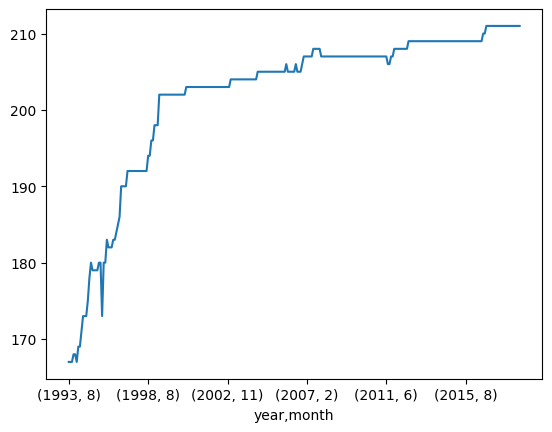

In [28]:
df_grupos_meses = df_fifa.groupby(['year', 'month'])['country'].count()

df_grupos_meses

df_grupos_meses.plot(kind='line')

plt.show()

## Unificar la columna de puntos

In [29]:
df_fifa ['points'] = df_fifa ['points_new_version'].fillna(df_fifa['points_old_version'])

df_fifa.sample(10)

,country,confederation,rank_date,points_old_version,points_new_version,rank,year,month,points
18021,Canada,CONCACAF,2002-04-17,514.0,NaN,74,2002,4,514.00
34869,Oman,AFC,2009-04-08,418.0,NaN,81,2009,4,418.00
43427,Tahiti,OFC,2012-11-07,NaN,214.69,139,2012,11,214.69
11361,Kenya,CAF,1999-07-21,366.0,NaN,100,1999,7,366.00
37513,Gabon,CAF,2010-07-14,700.0,NaN,34,2010,7,700.00
16126,Spain,UEFA,2001-07-18,733.0,NaN,6,2001,7,733.00
50204,Algeria,CAF,2015-08-06,NaN,941.24,19,2015,8,941.24
17503,Cayman Islands,CONCACAF,2002-01-16,195.0,NaN,165,2002,1,195.00
57407,El Salvador,CONCACAF,2018-06-07,NaN,441.53,72,2018,6,441.53
54134,Cambodia,AFC,2017-02-09,NaN,116.05,175,2017,2,116.05


In [30]:
# Quitar las variables de puntuacion

df_fifa.drop(columns=['points_new_version', 'points_old_version'],inplace = True)


In [31]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57547 entries, 0 to 57546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        57547 non-null  object        
 1   confederation  57547 non-null  object        
 2   rank_date      57547 non-null  datetime64[ns]
 3   rank           57547 non-null  int64         
 4   year           57547 non-null  int32         
 5   month          57547 non-null  int32         
 6   points         57547 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 2.6+ MB


## Analisis de datos por consulta y agrupamiento

Cómo es el comportamiento de Ecuador en el ranking FIFA

In [32]:
df_ecu = df_fifa.query('country == "Ecuador"')
df_ecu.sample(10)

,country,confederation,rank_date,rank,year,month,points
13952,Ecuador,CONMEBOL,2000-08-09,65,2000,8,495.00
6046,Ecuador,CONMEBOL,1996-12-18,33,1996,12,46.00
21442,Ecuador,CONMEBOL,2003-10-22,35,2003,10,626.00
52288,Ecuador,CONMEBOL,2016-06-02,13,2016,6,978.21
48122,Ecuador,CONMEBOL,2014-10-23,27,2014,10,825.98
5483,Ecuador,CONMEBOL,1996-09-25,31,1996,9,46.00
16768,Ecuador,CONMEBOL,2001-10-17,39,2001,10,591.00
2088,Ecuador,CONMEBOL,1994-10-25,57,1994,10,32.00
10912,Ecuador,CONMEBOL,1999-05-19,55,1999,5,509.00
36481,Ecuador,CONMEBOL,2009-12-16,37,2009,12,750.00


In [33]:
df_ecu_evol = df_ecu.groupby('year')['rank'].mean()
df_ecu_evol

year
1993    42.400000
1994    49.300000
1995    60.500000
1996    38.400000
1997    32.400000
1998    44.700000
1999    57.333333
2000    64.916667
2001    46.333333
2002    33.818182
2003    34.083333
2004    40.416667
2005    35.250000
2006    33.727273
2007    43.166667
2008    50.750000
2009    39.166667
2010    52.100000
2011    56.750000
2012    28.750000
2013    15.666667
2014    24.583333
2015    29.416667
2016    15.666667
2017    36.416667
2018    64.500000
Name: rank, dtype: float64

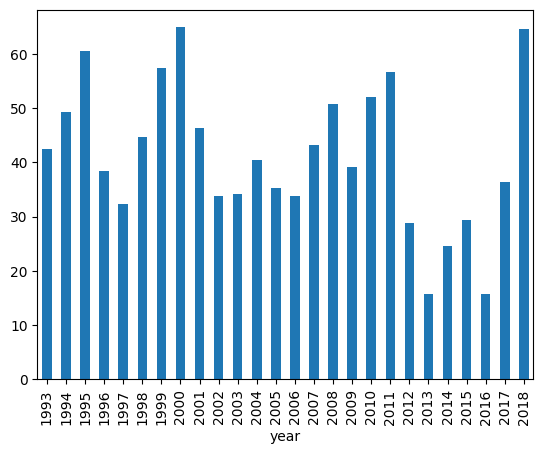

In [34]:
df_ecu_evol.plot (kind= 'bar')


plt.show()

Como es el comportamiento de ecuador en cuanto a puntos

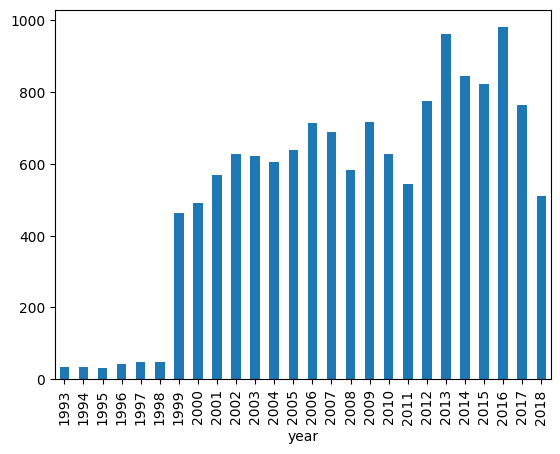

In [35]:
df_ecu_evol2 = df_ecu.groupby('year')['points'].mean()

df_ecu_evol2.plot(kind='bar')


plt.show()

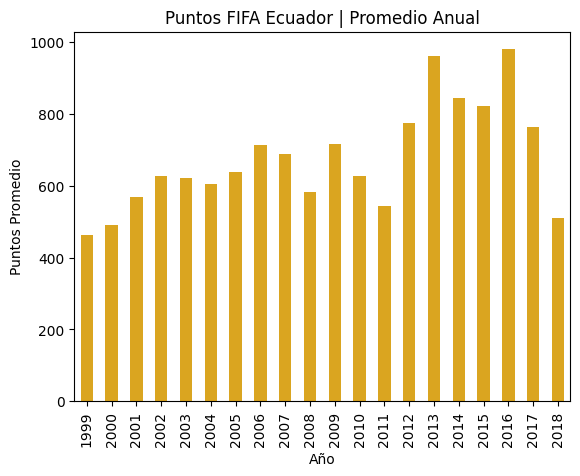

In [43]:
#Eliminamos datos atipicos

df_fifa = df_fifa.query('year >= 1999')
df_ecu = df_fifa.query('country == "Ecuador"')
df_ecu_evol = df_ecu.groupby('year')['rank'].mean()
df_ecu_evol2 = df_ecu.groupby('year')['points'].mean()

df_ecu_evol2.plot(
    kind = "bar",
    xlabel="Año",
    ylabel="Puntos Promedio",
    title="Puntos FIFA Ecuador | Promedio Anual",
    color="goldenrod"
)


plt.show()

Cual es el comportamiento historico del ranking FIFA por confederacion

In [40]:
df_conf = df_fifa.groupby(['confederation','year'])['rank'].mean()

#pivot table

df_rank_conf = df_fifa.pivot_table(
    index = 'year',
    columns= 'confederation',
    values= 'rank',
    aggfunc= 'mean',
)

df_rank_conf

confederation,AFC,CAF,CONCACAF,CONMEBOL,OFC,UEFA
year,,,,,,
1999,122.275794,112.908654,132.330097,41.125000,149.250000,53.192308
2000,123.045187,112.969551,129.845238,38.558333,153.575758,55.278846
2001,122.025194,113.766026,128.950000,35.700000,148.265152,58.496795
2002,121.919662,113.645105,128.898701,35.781818,142.636364,59.916084
2003,123.071970,111.044872,130.671429,43.191667,145.878788,59.459936
2004,116.270833,110.032051,133.933333,42.500000,150.503597,63.575321
2005,117.515152,112.429487,129.714286,41.775000,151.694444,63.286400
2006,122.263581,106.148342,131.467532,39.972727,168.603306,61.842932
2007,131.300725,104.621451,129.719048,39.341667,167.901515,61.004754


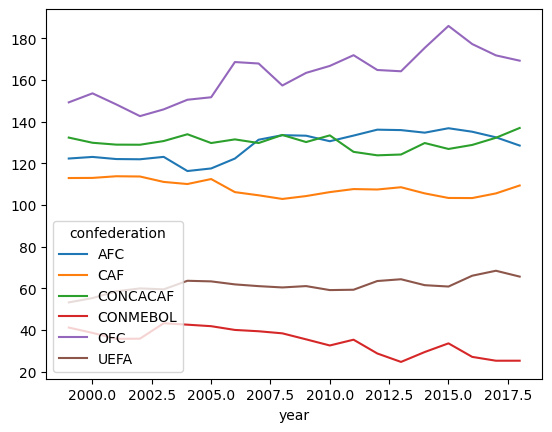

In [42]:
df_rank_conf.plot()
plt.show()

Solamente comparando UEFA y CONMEBOL, cuál ha sido su comportamiento histórico en el ranking.


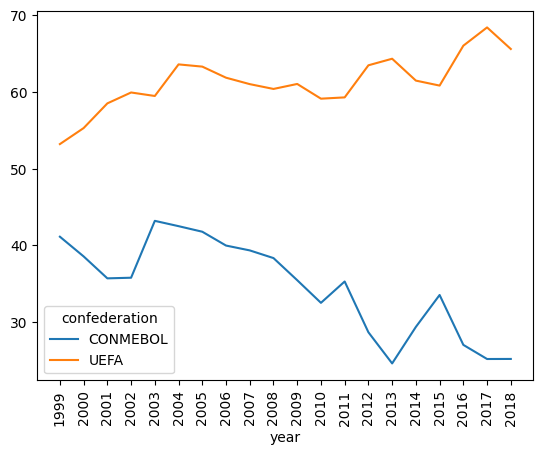

In [50]:
lista_conf= ['UEFA','CONMEBOL']

df_uefa_comn = df_fifa.query('confederation in @lista_conf')

df_rank = df_uefa_comn.pivot_table(
    index= 'year',
    columns= 'confederation',
    values= 'rank',
    aggfunc= 'mean'
)

df_rank.plot(
    kind = "line",
    xticks=df_fifa['year'].unique(),
    rot=90
)
plt.show()

Nuevamente comparando UEFA y CONMEBOL, cual ha sifo su comportamiento a nivel de puntos

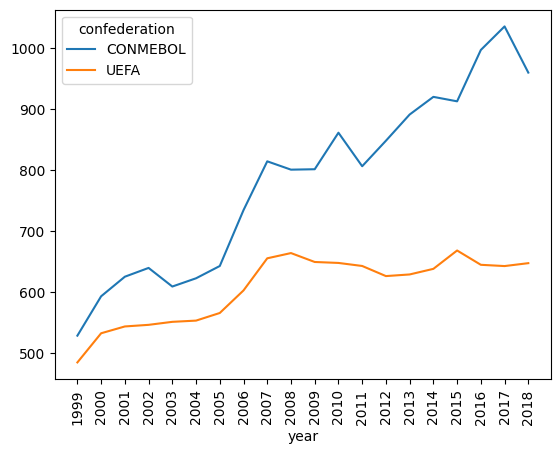

In [53]:
lista_conf= ['UEFA','CONMEBOL']

df_uefa_comn = df_fifa.query('confederation in @lista_conf')

df_rank = df_uefa_comn.pivot_table(
    index= 'year',
    columns= 'confederation',
    values= 'points',
    aggfunc= 'mean'
)

df_rank.plot(
    kind = "line",
    xticks=df_fifa['year'].unique(),
    rot=90
)
plt.show()

Finalmente, si solo se consideran los 5 mejores paises de cada confederación, ¿existe algún cambio a nivel de puntos?

In [64]:
#Top 5 de la UEFA
df_topuefa = df_uefa_comn.query('confederation == "UEFA"').groupby('country')['points'].mean().sort_values(ascending= False).head(5)
lista_uefa = df_topuefa.index

#top 5 de la CONMEBOL
df_topconm = df_uefa_comn.query('confederation == "CONMEBOL"').groupby('country')['points'].mean().sort_values(ascending= False).head(5)
lista_conm= df_topconm.index



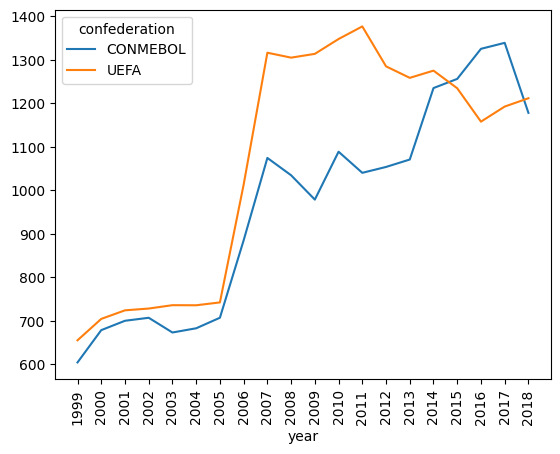

In [67]:
df_top = df_uefa_comn.query('country in @lista_uefa or country in @lista_conm')

df_rank_top = df_top.pivot_table (
    index= 'year',
    columns= 'confederation',
    values= 'points',
    aggfunc= 'mean'
)


df_rank_top.plot(
    kind = "line",
    xticks=df_fifa['year'].unique(),
    rot=90

)


plt.show()